# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - gender
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



In [2]:
# TODO: Implement task 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/Colab Notebooks/assignment2/task1.csv')

df.head(5)

,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     20401 non-null  int64 
 1   browser   20401 non-null  object
 2   os        20401 non-null  object
 3   locale    20401 non-null  object
 4   user_id   20401 non-null  int64 
 5   location  20401 non-null  object
 6   sites     20401 non-null  object
 7   time      20401 non-null  object
 8   date      20401 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
df.drop(columns=['index', 'sites'], inplace = True)

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

encoded_df = df
encoded_df = pd.get_dummies(df,columns=['browser','os','locale','location'])

encoded_df['datetime'] = encoded_df.apply(lambda row: datetime.strptime(row.date + " " + row.time,'%Y-%m-%d %H:%M:%S').timestamp(),axis=1)
encoded_df.drop(columns=['date','time'],inplace=True)

encoded_df['is_waldo'] = encoded_df['user_id'] == 0
encoded_df['is_waldo'] = encoded_df['is_waldo'].astype(int)
encoded_df.drop(columns=['user_id'],inplace=True)

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(encoded_df)

ready_df = pd.DataFrame(scaled_df,columns=encoded_df.columns)
ready_df.head()

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,datetime,is_waldo
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023179,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362314,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095486,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597437,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.780843,0.0


In [ ]:
X = ready_df.drop(columns=['is_waldo'])
y = ready_df['is_waldo']

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y,test_size=0.2)
X_train, X_test, y_train, y_test = tf.convert_to_tensor(X_train), tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_train), tf.convert_to_tensor(y_test)

In [ ]:
from tensorflow import keras
from keras import layers
from keras import losses,metrics

model = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics = ['accuracy',metrics.Precision(name='precision'),metrics.Recall(name='recall')])

In [ ]:
history = model.fit(X_train,y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
51/51 [==============================] - 2s 11ms/step - loss: 0.4201 - accuracy: 0.8636 - precision: 0.0181 - recall: 0.1208 - val_loss: 0.1458 - val_accuracy: 0.9755 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
51/51 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9816 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0634 - val_accuracy: 0.9755 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
51/51 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9816 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0379 - val_accuracy: 0.9755 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9882 - precision: 0.9674 - recall: 0.3708 - val_loss: 0.0225 - val_accuracy: 0.9945 - val_precision: 0.9844 - val_recall: 0.7875
Epoch 5/10
51/51 [==============================] - 0s 4ms/step - loss:

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

print(classification_report(y_test, y_pred.ravel()))

128/128 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4001
         1.0       0.93      1.00      0.96        80

    accuracy                           1.00      4081
   macro avg       0.97      1.00      0.98      4081
weighted avg       1.00      1.00      1.00      4081



In [ ]:
verify = pd.read_csv('drive/MyDrive/Colab Notebooks/assignment2/task_1_verify.csv')

In [ ]:
verify.drop(columns=['sites'], inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


def column_encoder(X, column_names):
  for name in column_names: 
    encoder = OneHotEncoder()
    encoder.fit(df[[name]])
    transformed = encoder.transform(X[[name]])

    for i in encoder.categories_: 
      X[i] = transformed.toarray()
    X = X.drop([name], axis=1)

  return X



In [ ]:
encoded_verify = verify
encoded_verify = column_encoder(verify, ['browser','os','locale','location'])

encoded_verify['datetime'] = encoded_verify.apply(lambda row: datetime.strptime(row.date + " " + row.time,'%Y-%m-%d %H:%M:%S').timestamp(),axis=1)
encoded_verify.drop(columns=['date','time'],inplace=True)

scaled_verify = scaler.fit_transform(encoded_verify)

ready_verify = pd.DataFrame(scaled_verify,columns=encoded_verify.columns)
ready_verify.head()

,Chrome,Firefox,Internet Explorer,Safari,Debian,MacOS,Ubuntu,Windows 10,Windows 7,Windows 8,...,New Zealand/Auckland,Russia/Moscow,Singapore/Singapore,Spain/Madrid,UK/London,USA/Chicago,USA/Miami,USA/New York,USA/San Francisco,datetime
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.435544
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145501
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069104
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.601649
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.637345


In [ ]:
y_pred = model.predict(tf.convert_to_tensor(ready_verify))
y_pred = y_pred > 0.5

y_pred = y_pred.ravel()

for idx, ans in enumerate(y_pred):
    print(f'{idx}: {int(ans)}')

2/2 [==============================] - 0s 6ms/step
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 1
32: 1
33: 1
34: 1
35: 1


### Questions
1. Did you find any usefull insights from your data analysis?
    - during data analysis i came up with the idea that it is possible to drop the 'sites' column since even without it our metrics perform well. also i've understood that the dataset is not balanced since the number of positive samples is much less, then the number of negative
2. What preprocessing techniques did you use? Why?
    - for preprocessing I used get_dummies function which ebables us to one hot our data. then the data was scaled using minmax scaler, which scales and translates each feature between zero and one.
3. Describe the fine-tuning process and how you reached your model architecture.
    - during fine-tuning process i was changing the number of layers and the number of neurons to come up with optimal solution and selected parameters seems to be optimal according to my statistics.
4. Which metric did you try to optemize for this task? Why?
    - it is better to use f1 metric since it is usually more useful than accuracy, especially if we have an uneven class distribution. also f1 is used to seek a balance between precision and recall

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
You will be working with the data in `task_2.zip` for image classification. Download [link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

The name of each image consists of 2 parts like `idx_label.BMB`, where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [1]:
# TODO: Implement task 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Paper: Deep Learning-Based Fingerprinting for Wireless Devices: A Comprehensive Survey by Y. Zhang, X. Liu, and Y. Ji (IEEE Communications Surveys and Tutorials, 2020)

The paper proposes a deep learning-based fingerprinting method for visible light communication (VLC) systems that utilizes the received signal strength (RSS) of VLC signals to build a unique fingerprint for each VLC transmitter. The fingerprint is then used to identify and authenticate communication between the transmitter and receiver. The paper discusses the challenges of VLC systems and how the proposed method addresses these challenges. The authors conducted experiments to evaluate the proposed method's performance and compared it with other fingerprinting methods, showing that it outperforms existing methods in accuracy and robustness to environmental factors. The paper also discusses potential applications of the proposed method, including indoor positioning and security systems, and concludes that it provides a promising solution for fingerprinting in VLC systems and has the potential to enhance their security and reliability.

In [ ]:
# TODO: Implement task 2
!unzip 'drive/MyDrive/assignment2/task_2.zip' -d 'papka'
!unzip './papka/test.zip' -d 'test'
!unzip './papka/train.zip' -d 'train'

In [3]:
train = './train/train/'
test = './test/content/test/'


In [4]:
import os
def split_images_by_class(from_folder, folder_for_result):
  if os.path.exists(folder_for_result):
    os.system(f'rm -rf {folder_for_result}')
  os.system(f'mkdir {folder_for_result}')
  folders = set()
  for root, _, files in os.walk(from_folder):
    for file_ in files:
      name, ext = os.path.splitext(file_)
      num, class_ = name.split('_')
      file_ex = ext.lstrip('.')

      if class_ not in folders:
        os.system(f'mkdir {folder_for_result}/{class_}')
        folders.add(class_)

      if file_ex == "":
        file_ex = "bmp"
      new_file_name = num + '.' + file_ex
      os.system(f'cp {os.path.join(root, file_)} {os.path.join(folder_for_result, class_, new_file_name)}')

In [5]:
should_split = True

if should_split:
  split_images_by_class('train', 'train_sep')
  split_images_by_class('test', 'test_sep')


In [6]:
import tensorflow as tf
train_directory = 'train_sep'
test_directory = 'test_sep'
batch_size = 32
img_height = 100
img_width = 100
col_class = 10

train_data1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

test_data1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

train_data = train_data1.flow_from_directory(
    train_directory,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_data1.flow_from_directory(
    train_directory,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    subset='validation'
)

test_data = test_data1.flow_from_directory(
    test_directory,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
)

Found 15533 images belonging to 10 classes.
Found 3880 images belonging to 10 classes.
Found 14272 images belonging to 10 classes.


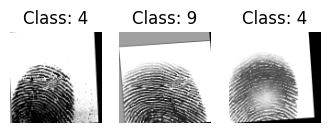

In [7]:
import matplotlib.pyplot as plt
import numpy as np

images, label = next(train_data)

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(4,2))
for i, ax in enumerate(axis.flat):
  ax.imshow(images[i])
  ax.set_title(f'Class: {np.argmax(label[i])}')
  ax.axis('off')
plt.show()

In [8]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [9]:
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [10]:
model = AlexNet((100, 100, 3), col_class)

In [13]:
os.mkdir('./logs')
os.mkdir('./logs/fit')

In [14]:
import datetime
log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

history = model.fit(train_data,
                    epochs=100,
                    steps_per_epoch=train_data.samples // batch_size,
                    validation_data=val_data,
                    validation_steps=val_data.samples // batch_size,
                    callbacks=callback_list,
                    verbose=1)
#model.summary()

Epoch 1/100
485/485 [==============================] - 97s 170ms/step - loss: 2.2552 - accuracy: 0.1840 - val_loss: 1.9630 - val_accuracy: 0.2761
Epoch 2/100
485/485 [==============================] - 73s 151ms/step - loss: 1.8031 - accuracy: 0.3342 - val_loss: 1.7222 - val_accuracy: 0.3657
Epoch 3/100
485/485 [==============================] - 72s 148ms/step - loss: 1.6263 - accuracy: 0.3963 - val_loss: 1.4637 - val_accuracy: 0.4556
Epoch 4/100
485/485 [==============================] - 79s 164ms/step - loss: 1.4696 - accuracy: 0.4549 - val_loss: 1.3914 - val_accuracy: 0.4804
Epoch 5/100
485/485 [==============================] - 78s 161ms/step - loss: 1.3874 - accuracy: 0.4844 - val_loss: 1.3264 - val_accuracy: 0.5054
Epoch 6/100
485/485 [==============================] - 70s 145ms/step - loss: 1.3064 - accuracy: 0.5141 - val_loss: 1.2814 - val_accuracy: 0.5367
Epoch 7/100
485/485 [==============================] - 78s 161ms/step - loss: 1.2638 - accuracy: 0.5260 - val_loss: 1.2461 -

### Questions
1. What preprocessing techniques did you use? Why?
    - firstly the images were splited by class and copied to a new folder named, then i used ImageDataGenerator class to to rescale the pixel values, perform random rotations, zooms, and shifts on the images
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*
4. What techniques did you use to improve model’s performance other than data augmentation
    - *Answer*

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [ ]:
# TODO: Implement task 3
import pandas as pd
df = pd.read_csv('drive/MyDrive/Colab Notebooks/assignment2/loan_data.csv')

df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

data = np.asarray(list(map(lambda x: [x], df['purpose'])))
purpose = OrdinalEncoder().fit_transform(data)
purpose = np.asarray(list(map(lambda x: x[0], purpose)))

new_data = pd.DataFrame({'purpose': purpose})
df.update(new_data)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2.0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1.0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2.0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2.0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1.0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2.0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4.0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.iloc[:, 1:]
y = df.iloc[:, :1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

dt_clf = DecisionTreeClassifier()
dt_clf.max_depth = 4
dt = dt_clf.fit(train_x, train_y)
score = dt.score(test_x, test_y)
print(score)

0.9780793319415448


In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_y = np.ravel(train_y)
test_y = np.ravel(test_y)
rf_clf = RandomForestClassifier()
rf = rf_clf.fit(train_x, train_y)
score = rf.score(test_x, test_y)
print(score)

0.9900835073068893


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': list(range(2, 10)),
              }

grid_search_clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                               cv=7, scoring='accuracy',
                               param_grid=param_grid
                               )

grid_search_clf.fit(train_x, train_y)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(test_x)
print(accuracy_score(test_y, y_pred))

0.950 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2}
0.969 (+/-0.013) for {'criterion': 'gini', 'max_depth': 3}
0.975 (+/-0.010) for {'criterion': 'gini', 'max_depth': 4}
0.985 (+/-0.008) for {'criterion': 'gini', 'max_depth': 5}
0.987 (+/-0.006) for {'criterion': 'gini', 'max_depth': 6}
0.987 (+/-0.007) for {'criterion': 'gini', 'max_depth': 7}
0.989 (+/-0.007) for {'criterion': 'gini', 'max_depth': 8}
0.991 (+/-0.004) for {'criterion': 'gini', 'max_depth': 9}
0.950 (+/-0.008) for {'criterion': 'entropy', 'max_depth': 2}
0.969 (+/-0.013) for {'criterion': 'entropy', 'max_depth': 3}
0.971 (+/-0.012) for {'criterion': 'entropy', 'max_depth': 4}
0.984 (+/-0.005) for {'criterion': 'entropy', 'max_depth': 5}
0.988 (+/-0.007) for {'criterion': 'entropy', 'max_depth': 6}
0.989 (+/-0.008) for {'criterion': 'entropy', 'max_depth': 7}
0.990 (+/-0.007) for {'criterion': 'entropy', 'max_depth': 8}
0.990 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 9}
0.950 (+/-0.008) for {'criterion

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    # 'n_estimators': list(range(10, 100)),
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': list(range(2, 10)),
              'bootstrap': [True, False]
              }

grid_search_clf = GridSearchCV(estimator=RandomForestClassifier(),
                               cv=7, scoring='accuracy',
                               param_grid=param_grid
                               )

grid_search_clf.fit(train_x, train_y)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(test_x)
print(accuracy_score(test_y, y_pred))

0.855 (+/-0.031) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2}
0.953 (+/-0.025) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3}
0.973 (+/-0.012) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4}
0.982 (+/-0.007) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5}
0.985 (+/-0.007) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6}
0.986 (+/-0.007) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7}
0.986 (+/-0.007) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8}
0.987 (+/-0.008) for {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9}
0.869 (+/-0.040) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2}
0.950 (+/-0.021) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3}
0.973 (+/-0.012) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4}
0.979 (+/-0.006) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5}
0.984 (+/-0.006) for {'bootstrap': True, 'criterion'

DecisionTreeClassifier(max_depth=4)


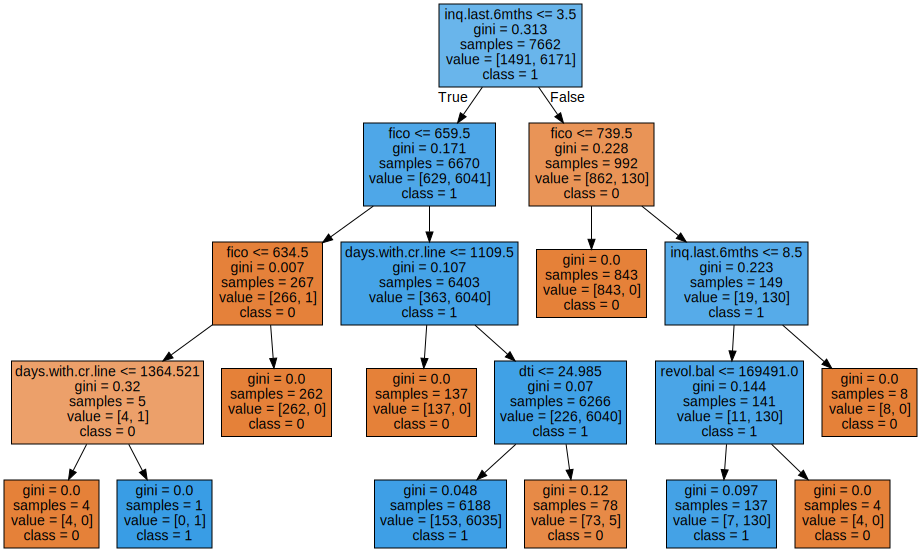

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
print(dt_clf)
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=dt_clf.feature_names_in_, 
                                class_names=dt_clf.classes_.astype(str), 
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

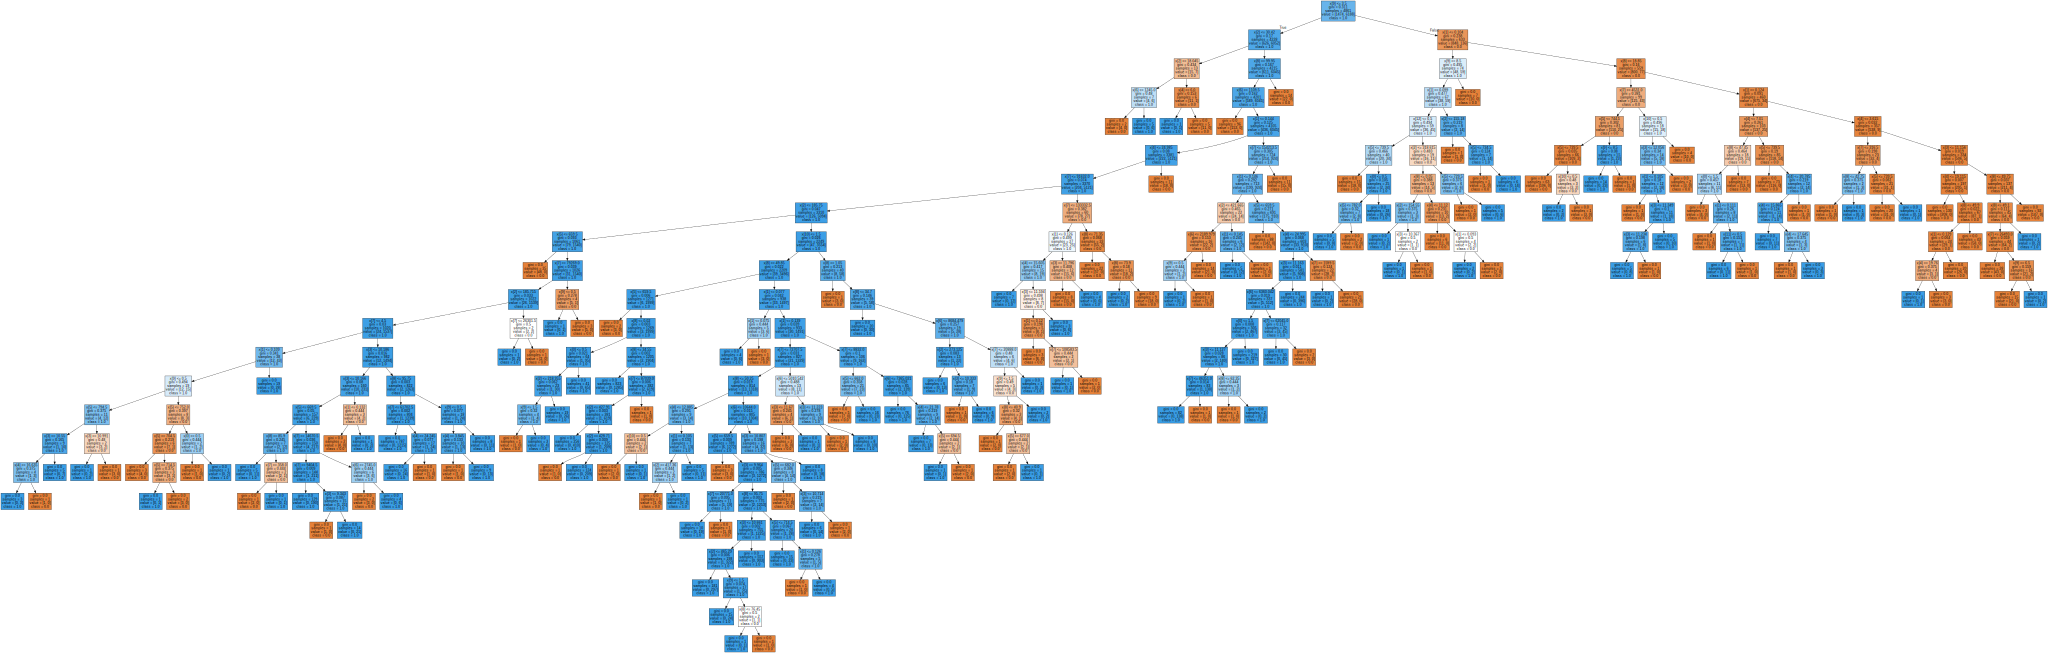

In [ ]:
rf = rf_clf[16]
dot_data = tree.export_graphviz(rf, out_file=None, 
                                # feature_names=rf.feature_names_in_, 
                                class_names=rf.classes_.astype(str), 
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

### Questions
1. How did the DT compare to the RF in performance? Why?
    - RF performed better than DT. that is possibly because random forest adds additional randomness to the model while growing trees
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - after fine-tuning max depths became equal
3. What is ensemble learning? What are its pros and cons?
    - ensemble methods are techniques that create multiple models and then combine them to produce improved results.
pros are such that the combined models increase the accuracy of the results significantly and also since the dispersion of the predictions and model performance are reduced, robustness increases.
cons are ensembling is less interpretable mainly the output of the ensembled model is hard to predict and explain. ensembling requires much more both time and space.
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - adaptive boosting is the first boosting technique. it works iteratively, recognizing incorrectly categorised data items and modifying their weights to reduce training error. up until it leaves the best predictor, the model continues to optimize sequentially.
gradient boosting is the second boosting technique. it operates by adding predictors to an ensemble in a sequential manner, with each one rectifying the mistakes of the one before it. the prior predictor's residual errors are trained on by the gradient boosting.
bootstrapping is the first bagging technique. it is a sampling technique where samples are taken using the replacement procedure from the entire set. the sampling with replacement method aids in the randomization of the selection process. the process is finished by applying the base learning algorithm to the samples.
aggregation is the second bagging procedure. it is done to combine all potential predictions' outcomes and randomize the result. the aggregate is based either on all of the results from the prediction models or on the probability bootstrapping processes.